# Building a CNN from Scratch - Lab

## Introduction

Now that you have background knowledge regarding how CNNs work and how to build them using Keras, its time to practice those skills a little more independently in order to build a CNN on your own to solve a image recognition problem. In this lab, you'll practice building an image classifier from start to finish using a CNN.  

## Objectives

In this lab you will: 

- Load images from a hierarchical file structure using an image datagenerator 
- Apply data augmentation to image files before training a neural network 
- Build a CNN using Keras 
- Visualize and evaluate the performance of CNN models 

## Loading the Images

The data for this lab concerns lung xray images for pneumonia. The original dataset is from Kaggle. We have downsampled this dataset in order to reduce training time for you when you design and fit your model to the data. ⏰ It is anticipated that this process will take approximately one hour to run on a standard machine, although times will vary depending on your particular computer and set up. At the end of this lab, you are welcome to try training on the complete dataset and observe the impact on the model's overall accuracy. 

You can find the initial downsampled dataset in a subdirectory, **chest_xray**, of this repository. 

In [1]:
import os, shutil

In [2]:
# Load the images; be sure to also preprocess these into tensors 

train_dir = 'chest_xray_downsampled/train'
validation_dir = 'chest_xray_downsampled/val/'
test_dir = 'chest_xray_downsampled/test/' 

In [ ]:
'''
file structure:
chest_xray_downsampled
    test
        NORMAL
        PNEUMONIA
    train
        NORMAL
        PNEUMONIA
    val
        NORMAL
        PNEUMONIA

'''

In [3]:
pip install Pillow

     |████████████████████████████████| 2.1MB 20.7MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
from PIL import Image

In [5]:
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

np.random.seed(123)

Using TensorFlow backend.
/opt/conda/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/envs/learn-env/lib/python3.6/site-pa

In [6]:
train_folder = os.path.join('chest_xray_downsampled/train')
train_pneum = os.path.join(train_folder, 'PNEUMONIA')
train_norm = os.path.join(train_folder, 'NORMAL')

test_folder = os.path.join('chest_xray_downsampled/test')
test_pneum = os.path.join(test_folder, 'PNEUMONIA')
test_norm = os.path.join(test_folder, 'NORMAL')

val_folder = os.path.join('chest_xray_downsampled/val')
val_pneum = os.path.join(val_folder, 'PNEUMONIA')
val_norm = os.path.join(val_folder, 'NORMAL')

In [9]:
print('There are', len(os.listdir('chest_xray_downsampled/test/NORMAL')), 'normal images in the test set')

There are 78 normal images in the test set


In [7]:
print('There are', len(os.listdir(train_pneum)), 'pneumonia images in the train set')
print('There are', len(os.listdir(train_norm)), 'normal images in the train set')
print('There are', len(os.listdir(test_pneum)), 'pneumonia images in the test set')
print('There are', len(os.listdir(test_norm)), 'normal images in the test set')
print('There are', len(os.listdir(val_pneum)), 'pneumonia images in the val set')
print('There are', len(os.listdir(val_norm)), 'normal images in the val set')

There are 1291 pneumonia images in the train set
There are 447 normal images in the train set
There are 130 pneumonia images in the test set
There are 78 normal images in the test set
There are 2 pneumonia images in the val set
There are 2 normal images in the val set


In [8]:
# get all the data in the directory train (1738 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64, 64), batch_size=1738)

# get all the data in the directory test (208 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), batch_size = 208) 

# get all the data in the directory validation (4 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64), batch_size = 4)

Found 1738 images belonging to 2 classes.
Found 208 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [9]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [12]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 1738
Number of testing samples: 208
Number of validation samples: 4
train_images shape: (1738, 64, 64, 3)
train_labels shape: (1738, 2)
test_images shape: (208, 64, 64, 3)
test_labels shape: (208, 2)
val_images shape: (4, 64, 64, 3)
val_labels shape: (4, 2)


In [13]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(1738, 12288)
(208, 12288)
(4, 12288)


In [72]:
train_y = np.reshape(train_labels[:,0], (1738,1))
test_y = np.reshape(test_labels[:,0], (208,1))
val_y = np.reshape(val_labels[:,0], (4,1))

## Designing the Model

Now it's time to design your CNN using Keras! Remember a few things when doing this: 

- You should alternate convolutional and pooling layers
- You should have later layers have a larger number of parameters in order to detect more abstract patterns
- Add some final dense layers to add a classifier to the convolutional base 
- Compile this model 

In [10]:
from keras import models
from keras import layers
np.random.seed(123)

In [11]:
# Your code here; design and compile the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

## Training and Evaluating the Model

Remember that training deep networks is resource intensive: depending on the size of the data, even a CNN with 3-4 successive convolutional and pooling layers is apt to take a hours to train on a high end laptop. Using 30 epochs and 8 layers (alternating between convolutional and pooling), our model took about 40 minutes to run on a year old macbook pro.


If you are concerned with runtime, you may want to set your model to run the training epochs overnight.  

**If you are going to run this process overnight, be sure to also script code for the following questions concerning data augmentation. Check your code twice (or more) and then set the notebook to run all, or something equivalent to have them train overnight.** 

In [16]:
# Set the model to train 
# ⏰ This cell may take several minutes to run 
history = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Train on 1738 samples, validate on 4 samples
Epoch 1/30
1738/1738 [==============================] - 15s 8ms/step - loss: 0.6150 - acc: 0.7250 - val_loss: 0.7886 - val_acc: 0.5000
Epoch 2/30
1738/1738 [==============================] - 15s 9ms/step - loss: 0.5721 - acc: 0.7428 - val_loss: 0.7924 - val_acc: 0.5000
Epoch 3/30
1738/1738 [==============================] - 15s 9ms/step - loss: 0.5656 - acc: 0.7428 - val_loss: 0.7733 - val_acc: 0.5000
Epoch 4/30
1738/1738 [==============================] - 16s 9ms/step - loss: 0.5589 - acc: 0.7428 - val_loss: 0.7775 - val_acc: 0.5000
Epoch 5/30
1738/1738 [==============================] - 16s 9ms/step - loss: 0.5492 - acc: 0.7428 - val_loss: 0.8327 - val_acc: 0.5000
Epoch 6/30
1738/1738 [==============================] - 15s 9ms/step - loss: 0.5306 - acc: 0.7428 - val_loss: 0.7808 - val_acc: 0.5000
Epoch 7/30
1738/1738 [==============================] - 16s 9ms/step - loss: 0.5048 - acc: 0.7457 - val_loss: 0.7807 - val_acc: 0.5000
Epoch 8/30

In [73]:
results_test = model.evaluate(test_images, test_y)

208/208 [==============================] - 1s 3ms/step


In [74]:
results_test

[0.6921536739055927, 0.7403846153846154]

In [20]:
# Plot history
import matplotlib.pyplot as plt
%matplotlib inline


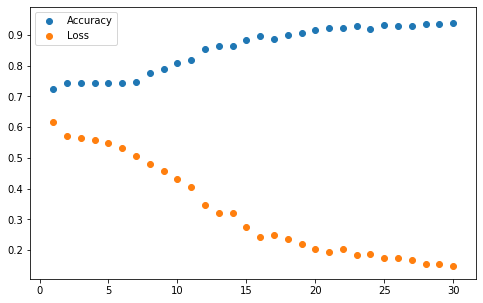

In [33]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()
ax.scatter(range(1,31), history.history['acc'], label = 'Accuracy')
ax.scatter(range(1,31), history.history['loss'], label = 'Loss')
ax.legend();

In [27]:
history.history

{'val_loss': [0.788573682308197,
  0.7924233675003052,
  0.7733055949211121,
  0.7774909734725952,
  0.8327042460441589,
  0.7807501554489136,
  0.7806934714317322,
  0.6831796765327454,
  1.572643756866455,
  1.548353910446167,
  0.6817522644996643,
  0.7128350734710693,
  1.1726467609405518,
  1.042615532875061,
  0.985271692276001,
  1.2263299226760864,
  0.7280036211013794,
  1.4589030742645264,
  1.1175482273101807,
  0.8397284746170044,
  1.2552218437194824,
  1.7913153171539307,
  1.1089155673980713,
  0.9221205711364746,
  0.9598191976547241,
  1.1620985269546509,
  0.8325089812278748,
  1.243067741394043,
  1.4979385137557983,
  1.2023484706878662],
 'val_acc': [0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.75,
  0.5,
  0.5,
  0.75,
  0.25,
  0.5,
  0.75,
  0.75,
  0.5,
  0.75,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5],
 'loss': [0.6150004633962766,
  0.572103072639439,
  0.5656262863903243,
  0.5589172953291784,
  0.549151

## Save the Model

In [34]:
# Your code here; save the model for future reference 
model.save('model_cnn_1.h5')

## Data Augmentation

Recall that data augmentation is typically always a necessary step when using a small dataset as this one which you have been provided. As such, if you haven't already, implement a data augmentation setup.

**Warning: ⏰ This process took nearly 4 hours to run on a relatively new macbook pro. As such, it is recommended that you simply code the setup and compare to the solution branch, or set the process to run overnight if you do choose to actually run the code.** 

In [35]:
# Add data augmentation to the model setup and set the model to train; 
# See warnings above if you intend to run this block of code 
# ⏰ This cell may take several hours to run 
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.3, 
                                   zoom_range=0.1, 
                                   horizontal_flip=False)

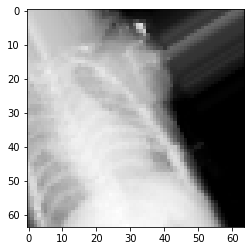

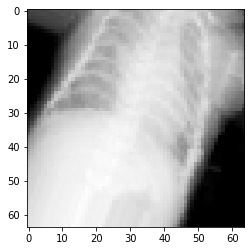

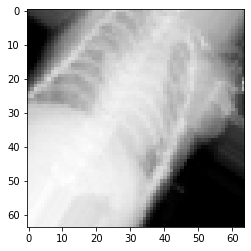

In [36]:
names = [os.path.join(train_pneum, name) for name in os.listdir(train_pneum)]
img_path = names[91]
img = load_img(img_path, target_size=(64, 64))

reshape_img = img_to_array(img) 
reshape_img = reshape_img.reshape((1,) + reshape_img.shape) 
i=0
for batch in train_datagen.flow(reshape_img, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 3 == 0:
        break
plt.show()

In [37]:
# get all the data in the directory train (542 images), and reshape them
train_generator = train_datagen.flow_from_directory(
        train_folder, 
        target_size=(64, 64), 
        batch_size = 32, 
        class_mode='binary')

# get all the data in the directory test, and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), 
        batch_size = 32,
        class_mode='binary') 

# get all the data in the directory validation, and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64),
        batch_size = 32,
        class_mode='binary')



Found 1738 images belonging to 2 classes.
Found 208 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [38]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

model_2.compile(loss='binary_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

In [39]:
history_2 = model_2.fit_generator(train_generator, 
                                steps_per_epoch=25, 
                                epochs=30, 
                                validation_data=val_generator, 
                                validation_steps=25)

Epoch 1/30
25/25 [==============================] - 14s 555ms/step - loss: 0.6299 - acc: 0.7425 - val_loss: 0.7515 - val_acc: 0.5000
Epoch 2/30
25/25 [==============================] - 14s 565ms/step - loss: 0.5825 - acc: 0.7417 - val_loss: 0.7906 - val_acc: 0.5000
Epoch 3/30
25/25 [==============================] - 15s 588ms/step - loss: 0.5671 - acc: 0.7519 - val_loss: 0.8476 - val_acc: 0.5000
Epoch 4/30
25/25 [==============================] - 15s 610ms/step - loss: 0.5877 - acc: 0.7338 - val_loss: 0.8040 - val_acc: 0.5000
Epoch 5/30
25/25 [==============================] - 14s 565ms/step - loss: 0.5725 - acc: 0.7475 - val_loss: 0.8379 - val_acc: 0.5000
Epoch 6/30
25/25 [==============================] - 15s 584ms/step - loss: 0.5628 - acc: 0.7557 - val_loss: 0.7800 - val_acc: 0.5000
Epoch 7/30
25/25 [==============================] - 15s 601ms/step - loss: 0.5819 - acc: 0.7350 - val_loss: 0.8176 - val_acc: 0.5000
Epoch 8/30
25/25 [==============================] - 15s 602ms/step - 

Save the model for future reference.  

In [40]:
# Save the model 
model.save('model_cnn_2.h5')

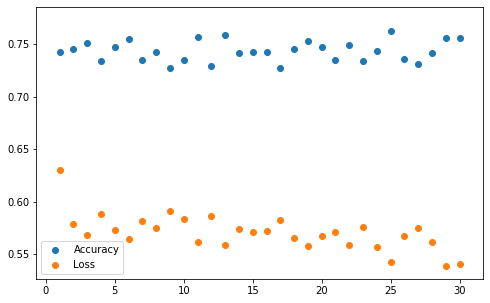

In [41]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()
ax.scatter(range(1,31), history_2.history['acc'], label = 'Accuracy')
ax.scatter(range(1,31), history_2.history['loss'], label = 'Loss')
ax.legend();

In [63]:
test_x_2, test_y_2 = next(test_generator)

In [70]:
results_test_2 = model_2.evaluate(test_x_2, test_y_2)

32/32 [==============================] - 0s 3ms/step


In [71]:
results_test_2

[0.7191357612609863, 0.625]

## Final Evaluation

Now use the test set to perform a final evaluation on your model of choice. 

In [ ]:
# Your code here 
# Perform a final evaluation using the test set

## Level Up (Optional): Adding More Data to the Model

As discussed, the current dataset we worked with is a subset of a dataset hosted on Kaggle. Increasing the data that we use to train the model will result in additional performance gains but will also result in longer training times and be more resource intensive.   

⏰ It is estimated that training on the full dataset will take approximately 4 hours (and potentially significantly longer) depending on your computer's specifications.

In order to test the impact of training on the full dataset, start by downloading the data from Kaggle here: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia.   

In [ ]:
# Optional extension; Your code here
# ⏰ This cell may take several hours to run 

In [77]:
# one extra hidden layers, increasing the biggest convolution to 5x5
model_3 = models.Sequential()
model_3.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Conv2D(32, (5, 5), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Conv2D(64, (4, 4), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Flatten())
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(1, activation='sigmoid'))

model_3.compile(loss='binary_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

In [ ]:
history_3 = model_3.fit_generator(train_generator, 
                                steps_per_epoch=25, 
                                epochs=30, 
                                validation_data=val_generator, 
                                validation_steps=25)

Epoch 1/30
25/25 [==============================] - 16s 635ms/step - loss: 0.6528 - acc: 0.7383 - val_loss: 0.7140 - val_acc: 0.5000
Epoch 2/30
25/25 [==============================] - 17s 665ms/step - loss: 0.5835 - acc: 0.7462 - val_loss: 0.8037 - val_acc: 0.5000
Epoch 3/30
25/25 [==============================] - 16s 631ms/step - loss: 0.5831 - acc: 0.7350 - val_loss: 0.8072 - val_acc: 0.5000
Epoch 4/30
25/25 [==============================] - 16s 624ms/step - loss: 0.5719 - acc: 0.7443 - val_loss: 0.8014 - val_acc: 0.5000
Epoch 5/30
25/25 [==============================] - 16s 632ms/step - loss: 0.5830 - acc: 0.7325 - val_loss: 0.8111 - val_acc: 0.5000
Epoch 6/30
25/25 [==============================] - 16s 640ms/step - loss: 0.5792 - acc: 0.7365 - val_loss: 0.7726 - val_acc: 0.5000
Epoch 7/30
25/25 [==============================] - 16s 628ms/step - loss: 0.5431 - acc: 0.7712 - val_loss: 0.8761 - val_acc: 0.5000
Epoch 8/30
 6/25 [======>.......................] - ETA: 12s - loss: 

In [ ]:
model.save('model_cnn_3.h5')

In [ ]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()
ax.scatter(range(1,31), history_3.history['acc'], label = 'Accuracy')
ax.scatter(range(1,31), history_3.history['loss'], label = 'Loss')
ax.legend();

In [ ]:
test_x_3, test_y_3 = next(test_generator)

In [ ]:
results_test_3 = model_3.evaluate(test_x_3, test_y_3)

In [ ]:
results_test_3

## Summary

Well done! In this lab, you practice building your own CNN for image recognition which drastically outperformed our previous attempts using a standard deep learning model alone. In the upcoming sections, we'll continue to investigate further techniques associated with CNNs including visualizing the representations they learn and techniques to further bolster their performance when we have limited training data such as here.